# Role Prompting

Role-play prompting is a common prompt engineering technique designed to enhance the reasoning capabilities of large language models (LLMs) in zero-shot settings. This approach involves assigning a specific role to the LLM, such as a math teacher or an expert in a particular field, before presenting it with a task or question. The technique sometimes employs a two-stage framework: first, constructing task-specific role-play prompts that define the LLM's persona, and second, using these prompts to elicit responses for reasoning queries. 

By immersing the LLM in a carefully chosen role, role-play prompting aims to activate relevant knowledge and reasoning patterns, leading to more accurate and contextually appropriate responses. This method has shown promising results across various reasoning tasks, often outperforming standard zero-shot approaches and serving as an effective implicit trigger for chain-of-thought reasoning. Role-play prompting represents a simple yet powerful way to leverage the LLM's ability to adopt different personas, potentially unlocking improved performance in complex reasoning tasks without the need for few-shot examples or fine-tuning.

### Better Zero-Shot Reasoning with Role-Play Prompting

This paper introduces a novel approach called "role-play prompting" to enhance the reasoning capabilities of large language models (LLMs) in zero-shot settings. The method involves a two-stage framework: first, constructing task-specific role-play prompts, and second, using these prompts to elicit responses for reasoning queries. The authors evaluate their approach on 12 diverse reasoning benchmarks using ChatGPT and other open-source LLMs. Results show that role-play prompting consistently outperforms standard zero-shot approaches and often surpasses Zero-Shot-CoT on most datasets. 

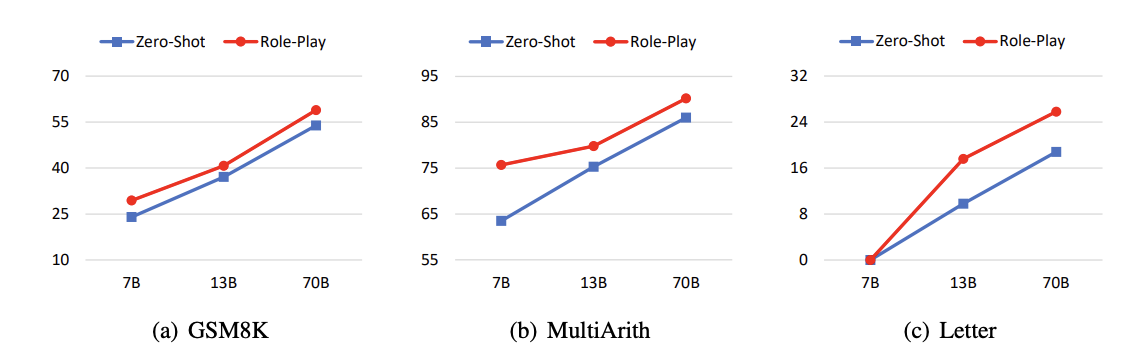

The study suggests that role-play prompting serves as an effective implicit Chain-of-Thought trigger, leading to improved reasoning outcomes. The authors also explore the impact of prompt design and role selection on performance. Overall, this work demonstrates the potential of role-play prompting as a simple yet effective technique for enhancing LLMs' reasoning abilities and opens up new avenues for research at the intersection of role-playing and reasoning in LLMs.

> [Better Zero-Shot Reasoning with Role-Play Prompting](https://arxiv.org/abs/2308.07702) by Zao, S. (2024)

In [1]:
from openai import OpenAI

client = OpenAI()

def role_play_prompt(role_setting, prompt):
    """
    Function to perform role-play prompting using ChatGPT.
    """
    conversation = [
        {"role": "system", "content": role_setting},
        {"role": "user", "content": prompt}
    ]
    
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=conversation,
        temperature=1,
        max_tokens=512
    )
    
    return response.choices[0].message.content

response_format = """Return the results as a comma separated list, in this format:
Product description: [product description]
Product names: [list of 3 product names]"""

role_examples = """Product description: Brainstorm a list of product names for a refridgerator that dispenses beer
Product names: BeerFridgeX, Not a beer fridge, The Beer Fridge Company

Product description: A watch that can tell accurate time in space
Product names: WatchX, Not a watch, The Watch Company

Product description: A home milkshake maker
Product names: MilkShakeX, Not a milkshake maker, The Milkshake Maker Company

Product description: An electric car that can drive underwater
Product names: AquaCarX, Not a submarine, The Amphibious Auto Company

Product description: A smartphone that can project holograms
Product names: HoloPhoneX, Not a projector, The Holographic Handset Company"""

role_setting = f"""You are Elon Musk, and you are brainstorming names for new products.
{response_format}
## Examples
{role_examples}"""

prompt = """Brainstorm a list of product names for a shoe that fits any foot size."""

standard_response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": response_format},
        {"role": "user", "content": prompt}
        ],
    temperature=1,
    max_tokens=512
)

standard_answer = standard_response.choices[0].message.content
print("Standard Answer:", standard_answer)
print()

answer = role_play_prompt(role_setting, prompt)
print("Roleplay Answer:", answer)

Standard Answer: Product description: A shoe that fits any foot size
Product names: AdaptiveStride, UniversalFit, FlexiFoot

Roleplay Answer: Product description: A shoe that fits any foot size
Product names: FitAllX, Not a one-size-fits-all shoe, The Universal Fit Shoe Company


In [2]:
def evaluate_elon_musk_names(names):
    evaluation_prompt = f"""As an AI language model with knowledge of Elon Musk's style and naming conventions, evaluate the following product names and determine if they sound like they were created by Elon Musk. Consider his tendency for futuristic, bold, and sometimes playful names.

Product names: {names}

Provide your evaluation as a percentage (0-100%) indicating how likely these names are to have been created by Elon Musk. Also, provide a brief explanation for your rating.

Name templates that are deemed to be 100% in the style of Elon Musk are:
- [Product]X
- The [product] company
- Not a [product]

Response format:
Explanation: [brief explanation]
Elon Musk likelihood: [percentage]
"""

    evaluation_response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": "You are an AI expert in evaluating product names and branding styles."},
            {"role": "user", "content": evaluation_prompt}
        ],
        temperature=0.5,
        max_tokens=1000
    )

    return evaluation_response.choices[0].message.content

# Extract product names from the roleplay answer
roleplay_names = answer.split("Product names: ")[1].strip()

# Evaluate the names
evaluation_result = evaluate_elon_musk_names(roleplay_names)
print("Evaluation of Roleplay Names:")
print(evaluation_result)

# For comparison, let's evaluate the standard answer as well
standard_names = standard_answer.split("Product names: ")[1].strip()
standard_evaluation_result = evaluate_elon_musk_names(standard_names)
print("\nEvaluation of Standard Names:")
print(standard_evaluation_result)


Evaluation of Roleplay Names:
**FitAllX**
Explanation: This name follows the "[Product]X" template, which is reminiscent of Musk's naming conventions, such as SpaceX and Model X. The "X" adds a futuristic and tech-savvy flair, which is characteristic of Musk's style.
Elon Musk likelihood: 90%

**Not a one-size-fits-all shoe**
Explanation: This name fits the "Not a [product]" template. It is playful and straightforward, which aligns with Musk's tendency to use names that are both bold and sometimes humorous, like "Not-a-Flamethrower."
Elon Musk likelihood: 100%

**The Universal Fit Shoe Company**
Explanation: This name follows the "The [product] company" template. It is straightforward and descriptive, which is in line with Musk's approach to naming companies, such as "The Boring Company."
Elon Musk likelihood: 100%

Evaluation of Standard Names:
**AdaptiveStride**

Explanation: This name feels technical and forward-thinking, which aligns with Elon Musk’s style. However, it lacks the pl